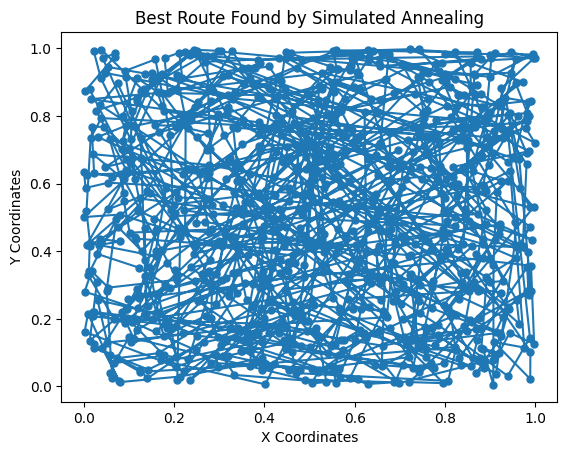

Best Route: [481, 397, 333, 409, 224, 319, 641, 673, 239, 712, 19, 699, 776, 768, 999, 586, 811, 147, 406, 107, 733, 217, 741, 993, 242, 881, 16, 369, 680, 754, 223, 27, 189, 496, 910, 466, 587, 694, 761, 656, 713, 709, 18, 69, 649, 363, 720, 874, 849, 132, 829, 832, 973, 617, 173, 635, 681, 965, 427, 331, 785, 278, 799, 749, 724, 138, 817, 246, 229, 907, 759, 633, 792, 248, 619, 536, 421, 65, 583, 883, 877, 81, 760, 335, 560, 946, 52, 114, 968, 670, 549, 362, 970, 921, 172, 524, 822, 316, 977, 592, 478, 60, 247, 630, 688, 161, 552, 902, 135, 394, 250, 312, 446, 218, 648, 661, 87, 636, 9, 557, 925, 364, 860, 861, 880, 784, 726, 149, 943, 120, 514, 513, 204, 528, 847, 612, 564, 606, 652, 878, 871, 113, 532, 675, 414, 307, 39, 64, 677, 498, 678, 740, 898, 471, 585, 682, 589, 85, 886, 255, 978, 48, 992, 953, 685, 550, 507, 45, 374, 928, 705, 812, 945, 602, 482, 927, 425, 20, 314, 541, 571, 517, 908, 914, 603, 264, 280, 905, 629, 640, 893, 655, 933, 433, 813, 823, 864, 340, 456, 222, 32, 4

In [48]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Load your dataset of 1000 cities with their coordinates
def load_dataset(filename):
  data = np.loadtxt(filename, delimiter=',')
  return data

# Replace 'full/path/to/cities.csv' with the actual full path to your dataset file
filename = "D:/MATERIALS/LEVEL 3/2/Evolutionary Algorithms/project/large.csv"
cities = load_dataset(filename)

# Calculate Euclidean distance between two cities
def distance(city1, city2):
  return np.linalg.norm(city1 - city2)

# Initialize a random route
def initial_route():
  route = list(range(num_cities))
  random.shuffle(route)
  return route

# Calculate the total distance of a route
def total_distance(route):
  total = 0
  for i in range(num_cities - 1):
    total += distance(cities[route[i]], cities[route[i+1]])
  total += distance(cities[route[-1]], cities[route[0]])  # Return to the starting city
  return total

# Simulated Annealing algorithm
def simulated_annealing(initial_route, initial_temp, cooling_rate, num_iterations):
  current_route = initial_route()
  best_route = current_route
  temp = initial_temp

  for i in range(num_iterations):
    new_route = current_route.copy()
    # Perform a random swap of two cities
    index1, index2 = random.sample(range(num_cities), 2)
    new_route[index1], new_route[index2] = new_route[index2], new_route[index1]
  
    current_energy = total_distance(current_route)
    new_energy = total_distance(new_route)
  
    # Acceptance probability
    if new_energy < current_energy or random.random() < math.exp((current_energy - new_energy) / temp):
      current_route = new_route
  
    # Update best route
    if total_distance(current_route) < total_distance(best_route):
      best_route = current_route

    # Cool the temperature
    temp *= cooling_rate
  
  return best_route

# Set initial parameters
initial_temp = 0.5183343294452877
cooling_rate = 0.99
num_iterations = 40000
num_cities = len(cities)

# Find the best route using Simulated Annealing
best_route = simulated_annealing(initial_route, initial_temp, cooling_rate, num_iterations)
best_distance = total_distance(best_route)

# Plot the best route
xs = [cities[i][0] for i in best_route]  # Extract x-coordinates from best route
ys = [cities[i][1] for i in best_route]  # Extract y-coordinates from best route

plt.plot(xs, ys, 'o-', markersize=5)  # Plot route with blue circles and lines
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Best Route Found by Simulated Annealing')
plt.show()

print("Best Route:", best_route)
print("Best Distance:", best_distance)
